# Kaprekar constant - 6174

https://www.youtube.com/watch?v=d8TRcZklX_Q

In [1]:
using DataStructures
using Plots

In [2]:
# Check for valid number (4 digits long and not 4 the same digits)
function valid(n::Int64)::Bool
    s = lpad(n, 4, "0")
    if maximum(values(counter([digit for digit in s]))) < 4 && length(s) == 4
        return true
    else
        return false
    end
end

valid (generic function with 1 method)

In [3]:
# Validate 1234
valid(1234)

true

In [4]:
# Validate multiple va,ues
valid.([1234, 1122, 1112, 1111, 111, 11, 1])

7-element BitVector:
 1
 1
 1
 0
 1
 1
 1

In [5]:
# High minus low calculation: 9218 --> 9821 - 1289
function high_minus_low(n::Int64, print_calculation::Bool=false)::Int64
    s = lpad(n, 4, "0")
    high = parse(Int64, join(sort([digit for digit in s], rev=true)))
    low = parse(Int64, join(sort([digit for digit in s], rev=false)))
    high_min_low = high - low
    if print_calculation
        println(high)
        println(lpad(low, 4, "0"))
        println("==== -/-")
        println(lpad(high_min_low, 4, "0"))
        println("----")
    end
    return high_min_low
end

high_minus_low (generic function with 2 methods)

In [6]:
# Demo
high_minus_low(9218)

8532

In [7]:
# Demo
high_minus_low(9218, true);

9821
1289
==== -/-
8532
----


In [8]:
# Returns true if n converges to the kaprekar number else false
function kaprekar(n::Int64, print_calc=false)::Bool
    if valid(n)
        k = 6174 # kaprekar value
        r = n # initial result
        while r != k
            r = high_minus_low(r, print_calc)
        end
        return true
    else
        return false
    end
end

kaprekar (generic function with 2 methods)

In [9]:
# Demo
kaprekar(9218, true);

9821
1289
==== -/-
8532
----
8532
2358
==== -/-
6174
----


In [10]:
# Demo
kaprekar(9218)

true

In [11]:
# Kaprekar check for numbers 1 to 9999
kaprekar_array = BitArray(falses(9999))

for i in 1:length(kaprekar_array)
    kaprekar_array[i] = kaprekar(i)
end

In [12]:
# Find all values that do not converge to the kaprekar number
findall(x -> x == false, kaprekar_array)

9-element Vector{Int64}:
 1111
 2222
 3333
 4444
 5555
 6666
 7777
 8888
 9999

In [13]:
# Demo
kaprekar(1, true);

1000
0001
==== -/-
0999
----
9990
0999
==== -/-
8991
----
9981
1899
==== -/-
8082
----
8820
0288
==== -/-
8532
----
8532
2358
==== -/-
6174
----


In [14]:
# Returns the number of steps to converge
function kaprekar_count(n::Int64)::Int64
    if valid(n)
        k = 6174 # kaprekar value
        r = n # initial result
        c = 0 # counter
        while r != k
            r = high_minus_low(r)
            c += 1
        end
        return c
    else
        return -1
    end
end

kaprekar_count (generic function with 1 method)

In [15]:
# Demo
kaprekar_count(9218)

2

In [16]:
# Count steps to converge
kap_count = Vector{Int64}()

for i in 1:9999
    push!(kap_count, kaprekar_count(i))
end

In [17]:
# Display numbers the maximum steps to converge
m = maximum(kap_count)
println("Maximum of $m steps to converge")
findall(x -> x == m, kap_count)

Maximum of 7 steps to converge


2184-element Vector{Int64}:
   14
   15
   16
   25
   41
   49
   51
   52
   58
   59
    ⋮
 9941
 9947
 9948
 9950
 9958
 9974
 9983
 9984
 9985

In [18]:
# Demo
kaprekar_count(14)

7

In [19]:
# Demo
kaprekar(14, true);

4100
0014
==== -/-
4086
----
8640
0468
==== -/-
8172
----
8721
1278
==== -/-
7443
----
7443
3447
==== -/-
3996
----
9963
3699
==== -/-
6264
----
6642
2466
==== -/-
4176
----
7641
1467
==== -/-
6174
----


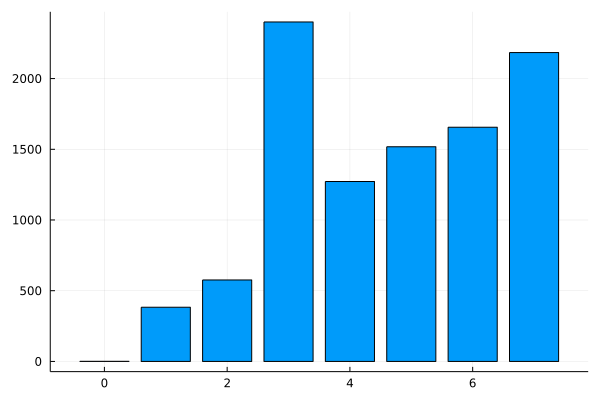

In [20]:
# Plots number of steps
step_counts = Dict(counter(kap_count))
delete!(step_counts, -1)
bar(step_counts, label=false)

In [21]:
# Show data
sort(step_counts)

OrderedDict{Int64, Int64} with 8 entries:
  0 => 1
  1 => 383
  2 => 576
  3 => 2400
  4 => 1272
  5 => 1518
  6 => 1656
  7 => 2184

In [22]:
# The 0 steps to converge is for the kaprekar constant itself
findall(x -> x == 0, kap_count)

1-element Vector{Int64}:
 6174